In [1]:
from google.colab import drive 
drive.mount('/content/gdrive',force_remount=True)

import os
os.chdir("gdrive/My Drive/Colab Notebooks") 

Mounted at /content/gdrive


In [2]:
import numpy as np
import pandas as pd  
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import glob
import os 
from scipy import stats 
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import matplotlib.colors
from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, Conv2d, MaxPool2d, Module, Softmax, BatchNorm2d, Dropout

In [3]:
import torchvision.transforms as transforms
from torch._tensor import Tensor
from torch.utils.data import DataLoader, Dataset, Subset
#device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
from matplotlib.pyplot import figure

In [4]:
from itertools import accumulate
from typing import Dict, List, Optional, Tuple

In [5]:
pip install ax-platform

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 39.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.8/481.8 KB 37.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.0/153.0 KB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 730.7/730.7 KB 57.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.8/245.8 KB 31.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 79.9 MB/s eta 0:00:00


In [6]:
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim


from ax.plot.contour import plot_contour
from ax.plot.trace import optimization_trace_single_method
from ax.service.managed_loop import optimize
from ax.utils.notebook.plotting import render


# Data 


In [7]:
comp = pd.read_csv('./data/Compositions.csv') #import of Composition datasheet with PbBr2, Cs-Oleate, Aceton Mixtures


In [8]:
Pb = np.array(comp['PbBr2  (mL)']) #PbBr2 vector
Pb = np.reshape(Pb, (Pb.shape[0],1))
#print(Pb)
Cs = np.array(comp['Cs-oleate (mL)']) #Cs-oleate vector 
Cs = np.reshape(Cs, (Cs.shape[0],1))
#print(Cs)
Ac = np.array(comp['Aceton (mL)']) #Aceton vector
Ac = np.reshape(Ac, (Ac.shape[0],1))
inputs=np.array([Pb,Cs,Ac]).T 

In [10]:
i=1;
m_size=221
m_list = [*range(1, m_size, 1)] #Select range 

S1c=[]

Wvl=[]

S_wvl=[*range(1,m_size,1)] #Initialize array where Largest Wavelength of csv will be stored 
S_wvl=np.array(S_wvl) 

S_mx=[*range(1,m_size,1)] #Initialize array where Largest Wavelength of csv will be stored 
S_mx=np.array(S_mx)

k=os.path.abspath("./data")
n=0
for i in m_list:
    dat1=pd.read_csv(k+'/'+ str(i)+'.csv') #Import of Data 
    dat1=dat1[1:] #Ignores first line
    
    Wv =np.array(dat1['Wavelength']) #Extraction of Wavelength in csv i
    Wv = np.reshape(Wv, (Wv.shape[0],1))
    Wv = np.array(Wv,dtype=float)
    
    Wvl.append(Wv) #Stored in Wvl  
    
    S_1c = np.array(dat1['S1c / R1c']) #Store Maximum absorption into S_1c
    S_1c = np.reshape(S_1c, (S_1c.shape[0],1)) 
    S_1c = np.array(S_1c,dtype=float) #changes type to float
    
    S1c.append(S_1c)#Stored in S1c
    
    S_1c_max=np.max(S_1c)  # Maximum absorption value 
    ind=np.argmax(S_1c)    #Index of Highest absorption value
    
    S_mx[i-1]=S_1c_max     #Store Maximum absorption value into array
    S_mx = np.reshape(S_mx, (S_mx.shape[0],1)) #Reshapes array into a column
                            
    S_wvl[i-1]= Wv[ind]     #Wavelength of highest value 
    S_wvl = np.reshape(S_wvl, (S_wvl.shape[0],1)) #Reshape array into column

In [11]:
print(S_wvl.dtype)

int64


In [12]:
S_wvl = np.array(S_wvl)
S_wvl = np.reshape(S_wvl, (S_wvl.shape[0],1)) #Turn into array 

inputs = np.array(inputs)
inputs=  np.reshape(inputs,(220,3)) #reshape vector

# Split

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs, S_wvl, test_size=0.2, random_state=42) #Change random state in loop and then do same thing again 

In [15]:
import numpy as np
np.random.seed(0)
import tensorflow as tf
tf.random.set_seed(0) 
tf.keras.utils.set_random_seed(0)   
tf.config.experimental.enable_op_determinism()

# Optimization
## Neural Network

In [16]:
device = torch.device('cuda')
print(device)
print(y_train.dtype)

cuda
int64


In [17]:
X_train=np.array(X_train)
X_train=torch.tensor(X_train)

y_train=np.array(y_train)
y_train=torch.tensor(y_train)

X_test=np.array(X_test)
X_test=torch.tensor(X_test)

y_test=np.array(y_test)
y_test=torch.tensor(y_test)

In [18]:
print(len(X_train))
print(len(X_train[0]))
print(len(y_train))
print(len(y_train[0]))
dtype = torch.float
X_train.type

176
3
176
1


<function Tensor.type>

# Neural Network

In [28]:
class Network(nn.Module):
    
    def __init__(self,neuron_number):
        super().__init__()  
        #name variable "neuron"
        self.init_args = {"neuron_number": neuron_number}
        self.linear_layers = Sequential(nn.Linear(in_features=3, out_features = neuron_number),) 
        self.linear_layers1 = Sequential(nn.Linear(in_features = neuron_number, out_features=5),)  
        self.linear_layers2 = Sequential(nn.Linear(in_features=5, out_features=5),) 
        self.linear_layers3 = Sequential(nn.Linear(in_features=5, out_features=5),) 

        self.out = nn.Linear(5,1)
    

    def forward(self,x):

        x = torch.nn.functional.silu(self.linear_layers(x)) #Sigmoid Linear Unit 
        x = torch.nn.functional.silu(self.linear_layers1(x)) #Sigmoid Linear Unit 
        x = torch.nn.functional.relu(self.linear_layers2(x)) #Rectified Linear Unit (ReLU)
        x = torch.nn.functional.relu(self.linear_layers3(x)) #Rectified Linear Unit (ReLU)

        x = torch.nn.functional.elu(self.out(x)) 
        return x
      

In [29]:
neuron_number = 7 
net = Network(neuron_number)  

In [21]:
def train(
    net: torch.nn.Module,
    Xtrain: X_train,
    ytrain: y_train,
    parameters: Dict[str, float],
    dtype: torch.dtype,
    device: torch.device,
) -> nn.Module:
    
    # Initialize network
    net.to(dtype=float, device=device)
    net.train()
    
    # Define loss and optimizer
    criterion = nn.MSELoss()
    optimizer = optim.SGD(
        net.parameters(),
        lr=parameters.get("lr", 0.1),
    )
    num_epochs = parameters.get("num_epochs", 1)

    # Train Network
    # pyre-fixme[6]: Expected `int` for 1st param but got `float`.
    for _ in range(num_epochs):
        # move data to proper dtype and device
        inputs_bay = Xtrain
        labels_bay = ytrain
        inputs_bay = inputs_bay.to(dtype=float, device=device)
        labels_bay = labels_bay.to(dtype=float, device=device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs_bay)
        loss = criterion(outputs, labels_bay)
        loss.backward()
        optimizer.step()
    return net

In [22]:
pip install torchmetrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 517.2/517.2 KB 34.9 MB/s eta 0:00:00


In [23]:
from torchmetrics import R2Score

def evaluate(
    net: nn.Module, Xtest,ytest,dtype: torch.dtype, device: torch.device
) -> float:
    net.eval()
    with torch.no_grad():
        # move data to proper dtype and device
        inputs_bay = Xtest
        labels_bay = ytest

        inputs_bay = inputs_bay.to(device='cuda:0', dtype= float)
        labels_bay = labels_bay.to(device='cuda:0', dtype = float)
        prediction = net.forward(inputs_bay)
  
        square_error=np.random.rand(prediction.shape[0])

        for i in range(len(Xtest)): 
         square_error[i] = (labels_bay[i] - prediction[i])**2
          
        rl_e = np.mean(square_error)
        #r2score = R2Score()
        #accuracy = r2score(torch.tensor(prediction,device = 'cuda:0'), torch.tensor(labels_bay,device = 'cuda:0'))

    return (-rl_e)
    #return (float(accuracy))

In [24]:
#prediction = [ 0, 34,45,21]
#labels_bay = [34, 21 , 51, 52]
#r2score = R2Score()
#accuracy = r2score(torch.tensor(prediction,device = 'cuda:0'), torch.tensor(labels_bay,device = 'cuda:0'))


In [25]:
def train_evaluate(parameterization):
    net = Network(neuron_number = 5)
    net = train(net=net, Xtrain= X_train, ytrain= y_train, parameters=parameterization, dtype= torch.float, device=device)
    return evaluate(net=net,Xtest= X_test, ytest= y_test, dtype=float, device=device)

In [26]:
best_parameters, values, experiment, model = optimize(
    parameters=[
        {"name": "lr", "type": "range", "bounds": [1e-6, 0.4], "log_scale": True},
        {"name":"neuron_number","type":"range","bounds":[0,10]},
    ],
    evaluation_function = train_evaluate ,
    objective_name='maximize',)

[INFO 02-16 07:49:26] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter lr. If that is not the expected value type, you can explicity specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 02-16 07:49:26] ax.service.utils.instantiation: Inferred value type of ParameterType.INT for parameter neuron_number. If that is not the expected value type, you can explicity specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 02-16 07:49:27] ax.service.utils.instantiation: Created search space: SearchSpace(parameters=[RangeParameter(name='lr', parameter_type=FLOAT, range=[1e-06, 0.4], log_scale=True), RangeParameter(name='neuron_number', parameter_type=INT, range=[0, 10])], parameter_constraints=[]).
[INFO 02-16 07:49:27] ax.modelbridge.dispatch_utils: Using Bayesian optimization since there are more ordered parameters than there are categories for the unordered categorical parameters.
[INFO 02-16 07:49:27] 

In [30]:
print(best_parameters)
#lr_new = 0.03759647193268123
lr_new=0.04483883038667217

{'lr': 0.04483883038667217, 'neuron_number': 7}


# Neural Network 

## Original

In [31]:
from torch.optim import Adam # Adam optimization algorithm 

optm = Adam(net.parameters(), lr = 0.1)
EPOCHS = 500 # Number of iterations 
crit=nn.MSELoss()

net.to(device)
X_train_py=torch.tensor(X_train).float()
X_test_py=torch.tensor(X_test).float()
y_train_py=torch.tensor(y_train).float()
y_test_py=torch.tensor(y_test).float()
X_train_py = X_train_py.to(device)
y_train_py= y_train_py.to(device)
X_test_py= X_test_py.to(device)
y_test_py= y_test_py.to(device)


for epoch in range(EPOCHS):    
    epoch_loss_py = 0
    
    net.zero_grad()
    output_py = net(X_train_py.float()) #model called
    loss_py =crit(output_py,y_train_py) #Evaluate prediction 
    loss_py.backward() #Backpropagation 
    optm.step() #update of weights

    prediction_py = net.forward(X_test_py) #Forward pass 
    
    y_test_py.detach().numpy #Transformation to numpy to use np functions
    prediction_py.detach().numpy 
    relative_error=np.random.rand(prediction_py.shape[0]) #Array of size initialized
    nN_errors=np.random.rand(prediction_py.shape[0]) #Array of size initialized
    
    for i in range(prediction_py.shape[0]):
        relative_error[i] = float(abs(prediction_py[i] - y_test_py[i])/y_test_py[i])  #Relative Error
        nN_errors[i]=(y_test_py[i]-prediction_py[i])**2

Nn_errors_mean=np.mean(nN_errors)
print(Nn_errors_mean)

<ipython-input-31-03b656573d0e>:8: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

<ipython-input-31-03b656573d0e>:9: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

<ipython-input-31-03b656573d0e>:10: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

<ipython-input-31-03b656573d0e>:11: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).



134.00301385069773


## Optimized Learning rate 

In [32]:
optimizer = Adam(net.parameters(), lr = lr_new)
EPOCHS = 500 # Number of iterations 
criterion=nn.MSELoss()

net.to(device)
X_train_py=torch.tensor(X_train).float()
X_test_py=torch.tensor(X_test).float()
y_train_py=torch.tensor(y_train).float()
y_test_py=torch.tensor(y_test).float()
X_train_py = X_train_py.to(device)
y_train_py= y_train_py.to(device)
X_test_py= X_test_py.to(device)
y_test_py= y_test_py.to(device)


for epoch in range(EPOCHS):    

    net.zero_grad()
    output2_py = net(X_train_py.float()) #model called
    loss2_py =criterion(output2_py,y_train_py) #Evaluate prediction 
    loss2_py.backward() #Backpropagation 
    optimizer.step() #update of weights

    prediction2_py = net.forward(X_test_py) #Forward pass 
    
    y_test_py.detach().numpy #Transformation to numpy to use np functions
    prediction2_py.detach().numpy 
    relative_error2=np.random.rand(prediction2_py.shape[0]) #Array of size initialized
    nN_errors2=np.random.rand(prediction2_py.shape[0]) #Array of size initialized
    
    for i in range(prediction2_py.shape[0]):
        relative_error2[i] = float(abs(prediction2_py[i] - y_test_py[i])/y_test_py[i])  #Relative Error
        nN_errors2[i]=(y_test_py[i] - prediction2_py[i])**2

Nn_errors2_mean=np.mean(nN_errors2)
print(Nn_errors2_mean)

<ipython-input-32-74d12fb33f5e>:6: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

<ipython-input-32-74d12fb33f5e>:7: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

<ipython-input-32-74d12fb33f5e>:8: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

<ipython-input-32-74d12fb33f5e>:9: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).



125.71453338116407


In [33]:
print('MSE of Original Neural Network: ', Nn_errors_mean)
relative_error_pcg=relative_error*100
relative_error_avg=np.mean(relative_error_pcg)
print("Average Relative Error = " , round(relative_error_avg,3),'%')
nN_accuracy = 100 - np.mean(relative_error_pcg)
print('Accuracy of Original Neural Network:', round(nN_accuracy, 3), '%.')

print('\nMSE of Optimized Neural Network: ', Nn_errors2_mean)
relative_error2_pcg=relative_error2*100
relative_error2_avg=np.mean(relative_error2_pcg)
print("Average Relative Error = " , round(relative_error2_avg,3),'%')
nN2_accuracy = 100 - np.mean(relative_error2_pcg)
print('Accuracy:', round(nN2_accuracy, 3), '%.')

MSE of Original Neural Network:  134.00301385069773
Average Relative Error =  1.554 %
Accuracy of Original Neural Network: 98.446 %.

MSE of Optimized Neural Network:  125.71453338116407
Average Relative Error =  1.515 %
Accuracy: 98.485 %.


Text(0.5, 1.0, 'Error Distribution with Optimization \n Neural Network')

<Figure size 360x360 with 0 Axes>

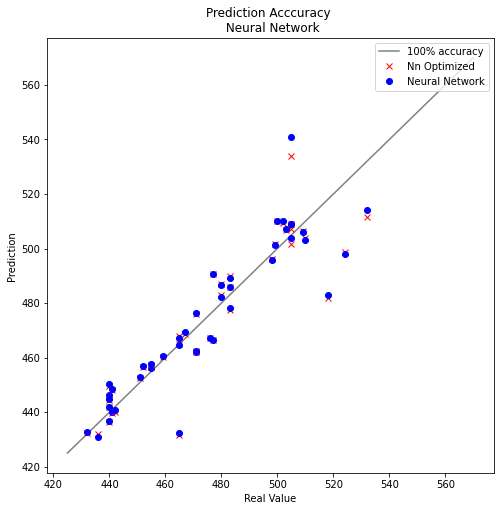

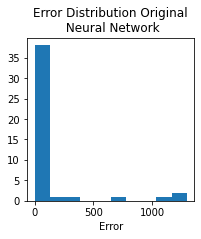

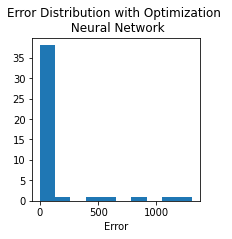

In [34]:
#print(prediction2_py)
plt.figure(figsize=(5,5))
f, ax = plt.subplots(figsize=(8, 8))
ax.plot([425, 570], [425, 570], ls="-", c=".5")
for i in range (len(y_test_py)):
    y_plot=float(y_test_py[i])
    x2_plot=float(prediction2_py[i])
    x_plot=float(prediction_py[i])
    plt.plot(y_plot,x2_plot,"x",color='r')
    plt.plot(y_plot,x_plot, "o",color='b')

plt.legend(['100% accuracy','Nn Optimized','Neural Network' ],loc='upper right')
plt.title('Prediction Acccuracy \n Neural Network')
plt.xlabel('Real Value')
plt.ylabel('Prediction')

plt.figure(figsize=(3,3))
plt.hist(nN_errors)
plt.xlabel('Error')
plt.title('Error Distribution Original\n Neural Network')


plt.figure(figsize=(3,3))
plt.hist(nN_errors2)
plt.xlabel('Error')
plt.title('Error Distribution with Optimization \n Neural Network')

# With K-fold cross validation 

In [35]:
from sklearn.model_selection import KFold
from torch.optim import Adam # Adam optimization algorithm 
from numpy import mean

n_split=4
nN_error_kf=[]

for train_index,test_index in KFold(n_split).split(inputs):
    x_train_kf,x_test_kf= inputs[train_index],inputs[test_index]
    y_train_kf,y_test_kf= S_wvl[train_index],S_wvl[test_index]
        
    params_kf = list(net.parameters())
    optm_kf = Adam(net.parameters(), lr = lr_new)

    EPOCHS = 500
    criterion_kf = nn.MSELoss()
    
    x_train_kf=torch.tensor(x_train_kf).float()
    x_test_kf=torch.tensor(x_test_kf).float()
    y_train_kf=torch.tensor(y_train_kf).float()
    y_test_kf=torch.tensor(y_test_kf).float()
    
    net.to(device)
    x_train_kf = x_train_kf.to(device)
    y_train_kf= y_train_kf.to(device)
    x_test_kf= x_test_kf.to(device)
    y_test_kf= y_test_kf.to(device)


    for epoch in range(EPOCHS):    
        epoch_loss_kf = 0
    
        net.zero_grad()
        output_kf = net(x_train_kf.float())
        loss_kf =criterion_kf(output_kf,y_train_kf)
        loss_kf.backward() #training of weights 
        optm_kf.step()

        prediction_kf = net.forward(x_test_kf) #Forward pass 
    
        y_test_kf.detach().numpy
        prediction_kf.detach().numpy
        relative_error_kf=np.random.rand(prediction_kf.shape[0])
        nN_errors_kf=np.random.rand(prediction_kf.shape[0])
    
    for i in range(prediction_kf.shape[0]):
        relative_error_kf[i] = float(abs(prediction_kf[i] - y_test_kf[i])/y_test_kf[i])  #Relative Error
        nN_errors_kf[i]=(y_test_kf[i]-prediction_kf[i])**2

nN_error_mean_kf= np.mean(nN_errors_kf)


In [36]:
relative_error3_pcg=relative_error_kf*100
nN3_accuracy = 100 - np.mean(relative_error3_pcg)

print('K-fold Cross Validation')
print('MSE of Neural Network model: ', nN_error_mean_kf)
print('Accuracy:', round(nN3_accuracy, 3), '%.')

K-fold Cross Validation
MSE of Neural Network model:  117.45709756775337
Accuracy: 98.247 %.


In [37]:
print(len(y_test_kf))
print(len(y_test_py))

55
44


Text(0.5, 1.0, 'Error Distribution with Optimization and Kfold Validation \n Neural Network')

<Figure size 360x360 with 0 Axes>

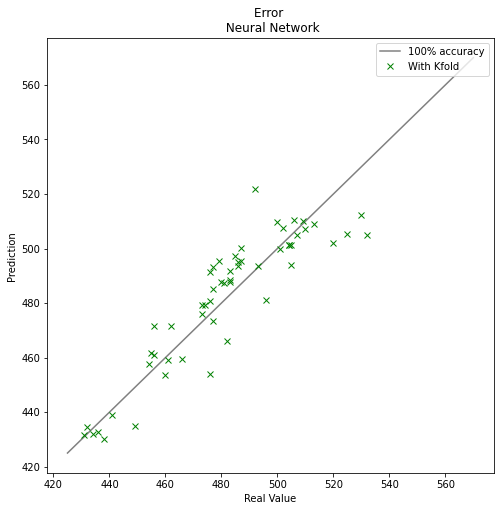

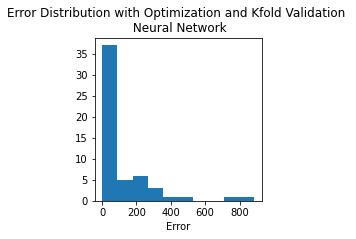

In [38]:
plt.figure(figsize=(5,5))
f, ax = plt.subplots(figsize=(8, 8))
ax.plot([425, 570], [425, 570], ls="-", c=".5")
for i in range (len(y_test_kf)):
    y_plot2=float(y_test_kf[i])
    x2_plot=float(prediction_kf[i])
    plt.plot(y_plot2,x2_plot,"x",color='g')

plt.legend(['100% accuracy','With Kfold'],loc='upper right')
plt.title('Error \n Neural Network')
plt.xlabel('Real Value')
plt.ylabel('Prediction')

plt.figure(figsize=(3,3))
plt.hist(nN_errors_kf)
plt.xlabel('Error')
plt.title('Error Distribution with Optimization and Kfold Validation \n Neural Network')

In [39]:
pip install webcolors

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [40]:
import webcolors

def closest_colour(requested_colour):
    min_colours = {}
    for key, name in webcolors.CSS3_HEX_TO_NAMES.items():
        r_c, g_c, b_c = webcolors.hex_to_rgb(key)
        rd = (r_c - requested_colour[0]) ** 2
        gd = (g_c - requested_colour[1]) ** 2
        bd = (b_c - requested_colour[2]) ** 2
        min_colours[(rd + gd + bd)] = name
    return min_colours[min(min_colours.keys())]

def get_colour_name(requested_colour):
    try:
        closest_name = actual_name = webcolors.rgb_to_name(requested_colour)
    except ValueError:
        closest_name = closest_colour(requested_colour)
        actual_name = None
    return actual_name, closest_name

In [41]:
import sys
import os
import traceback
import optparse
import time
import logging

#Function actually used to change the values of wavelength into colours
def wavelength_to_rgb(wavelength, gamma=0.8):
    '''
    Based on code by Dan Bruton
    http://www.physics.sfasu.edu/astro/color/spectra.html
    '''

    wavelength = float(wavelength)
    if wavelength >= 380 and wavelength <= 440:
        attenuation = 0.3 + 0.7 * (wavelength - 380) / (440 - 380)
        R = ((-(wavelength - 440) / (440 - 380)) * attenuation) ** gamma
        G = 0.0
        B = (1.0 * attenuation) ** gamma
    elif wavelength >= 440 and wavelength <= 490:
        R = 0.0
        G = ((wavelength - 440) / (490 - 440)) ** gamma
        B = 1.0
    elif wavelength >= 490 and wavelength <= 510:
        R = 0.0
        G = 1.0
        B = (-(wavelength - 510) / (510 - 490)) ** gamma
    elif wavelength >= 510 and wavelength <= 580:
        R = ((wavelength - 510) / (580 - 510)) ** gamma
        G = 1.0
        B = 0.0
    elif wavelength >= 580 and wavelength <= 645:
        R = 1.0
        G = (-(wavelength - 645) / (645 - 580)) ** gamma
        B = 0.0
    elif wavelength >= 645 and wavelength <= 750:
        attenuation = 0.3 + 0.7 * (750 - wavelength) / (750 - 645)
        R = (1.0 * attenuation) ** gamma
        G = 0.0
        B = 0.0
    else:
        R = 0.0
        G = 0.0
        B = 0.0
    R *= 255
    G *= 255
    B *= 255
    return (int(R), int(G), int(B))

In [42]:
import matplotlib.colors
def wavelength_to_rgb_2(wavelength, gamma=0.8):
    ''' taken from http://www.noah.org/wiki/Wavelength_to_RGB_in_Python
    Based on code by Dan Bruton
    http://www.physics.sfasu.edu/astro/color/spectra.html
    Additionally alpha value set to 0.5 outside range
    '''
    wavelength = float(wavelength)
    if wavelength >= 380 and wavelength <= 750:
        A = 1.
    else:
        A=0.5
    if wavelength < 380:
        wavelength = 380.
    if wavelength >750:
        wavelength = 750.
    if wavelength >= 380 and wavelength <= 440:
        attenuation = 0.3 + 0.7 * (wavelength - 380) / (440 - 380)
        R = ((-(wavelength - 440) / (440 - 380)) * attenuation) ** gamma
        G = 0.0
        B = (1.0 * attenuation) ** gamma
    elif wavelength >= 440 and wavelength <= 490:
        R = 0.0
        G = ((wavelength - 440) / (490 - 440)) ** gamma
        B = 1.0
    elif wavelength >= 490 and wavelength <= 510:
        R = 0.0
        G = 1.0
        B = (-(wavelength - 510) / (510 - 490)) ** gamma
    elif wavelength >= 510 and wavelength <= 580:
        R = ((wavelength - 510) / (580 - 510)) ** gamma
        G = 1.0
        B = 0.0
    elif wavelength >= 580 and wavelength <= 645:
        R = 1.0
        G = (-(wavelength - 645) / (645 - 580)) ** gamma
        B = 0.0
    elif wavelength >= 645 and wavelength <= 750:
        attenuation = 0.3 + 0.7 * (750 - wavelength) / (750 - 645)
        R = (1.0 * attenuation) ** gamma
        G = 0.0
        B = 0.0
    else:
        R = 0.0
        G = 0.0
        B = 0.0
    return (R,G,B,A)

In [43]:
float(y_test_kf[0])
rgb=float(y_test_kf[1])
freq=wavelength_to_rgb(rgb)

freq=[]
for i in range (prediction_kf.shape[0]):
    rgb=float(prediction_kf[i])
    freq.append(wavelength_to_rgb(rgb))

freq2=[]
for i in range (S_wvl.shape[0]):
    rgb2=float(S_wvl[i])
    freq2.append(wavelength_to_rgb(rgb2))

clr_name=[]
for i in range(len(freq)):
    clr_name.append(closest_colour(freq[i]))

clr_name2=[]
for i in range(len(freq2)):
    clr_name2.append(closest_colour(freq2[i]))
#print(clr_name)


In [44]:
pl=x_test_kf[0]
print(pl)
print(float(pl[0]))
#pl_x=pl[0]

tensor([0.4136, 0.1126, 0.4738], device='cuda:0')
0.41359949111938477


220


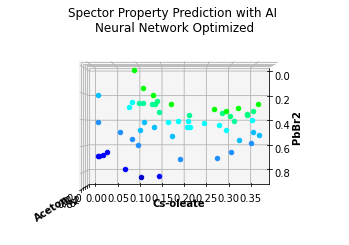

<Figure size 1080x1080 with 0 Axes>

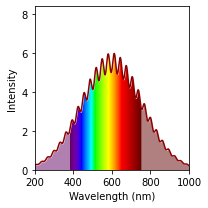

In [45]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
print(len(Cs))
plt.figure(figsize=(15,15)) 
for i in range (x_test_kf.shape[0]):
    pl=x_test_kf[i]
    pl_x=float(pl[0]) #Pb
    pl_y=float(pl[1]) #Cs
    pl_z=float(pl[2]) #Ac
    sctt=ax.scatter3D(pl_x,pl_y,pl_z,c=[clr_name[i]])

ax.set_xlabel('PbBr2 ', fontweight ='bold')
ax.set_ylabel('Cs-oleate', fontweight ='bold')
ax.set_zlabel('Aceton', fontweight ='bold')
ax.set_title('Spector Property Prediction with AI \nNeural Network Optimized')

#Uncomment to view specific precursor: 
#ax.view_init(10, 45) #Isometric view
#ax.view_init(10, 90) #PbBr2
ax.view_init(90, 0) # Cs-oleate
#ax.view_init(0, 90) # Aceton

clim=(350,780)
norm = plt.Normalize(*clim)
wl = np.arange(clim[0],clim[1]+1,2)
colorlist = list(zip(norm(wl),[wavelength_to_rgb_2(w) for w in wl]))
spectralmap = matplotlib.colors.LinearSegmentedColormap.from_list("spectrum", colorlist)

fig, axs = plt.subplots(1, 1, figsize=(3,3), tight_layout=True)

wavelengths = np.linspace(200, 1000, 1000)
spectrum = (5 + np.sin(wavelengths*0.1)**2) * np.exp(-0.00002*(wavelengths-600)**2)
plt.plot(wavelengths, spectrum, color='darkred')

y = np.linspace(0, 6, 100)
X,Y = np.meshgrid(wavelengths, y)

extent=(np.min(wavelengths), np.max(wavelengths), np.min(y), np.max(y))

plt.imshow(X, clim=clim,  extent=extent, cmap=spectralmap, aspect='auto')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity')
plt.fill_between(wavelengths, spectrum, 8, color='w')

In [ ]:
a*